# Auto Encoder / Clustering over printer features

## Install required packages

In [224]:
if (!require("stringr")) { install.packages("stringr", lib='/R/library', repos='http://cran.us.r-project.org') }
if (!require("magrittr")) { install.packages("magrittr", lib='/R/library', repos='http://cran.us.r-project.org') }
if (!require("readr")) { install.packages("readr", lib='/R/library', repos='http://cran.us.r-project.org') }
if (!require("readr")) { install.packages("readr", lib='/R/library', repos='http://cran.us.r-project.org') }
if (!require("lubridate")) { install.packages("lubridate", lib='/R/library', repos='http://cran.us.r-project.org') }
if (!require("tidyr")) { install.packages("tidyr", lib='/R/library', repos='http://cran.us.r-project.org') }
if (!require("dplyr")) { install.packages("dplyr", lib='/R/library', repos='http://cran.us.r-project.org') }
if (!require("zoo")) { install.packages("zoo", lib='/R/library', repos='http://cran.us.r-project.org') }
if (!require("purrr")) { install.packages("purrr", lib='/R/library', repos='http://cran.us.r-project.org') }
if (!require("psych")) { install.packages("psych", lib='/R/library', repos='http://cran.us.r-project.org') }
if (!require("data.table")) { install.packages("data.table", lib='/R/library', repos='http://cran.us.r-project.org') }
if (!require("moments")) { install.packages("moments", lib='/R/library', repos='http://cran.us.r-project.org') }
if (!require("h2o")) { install.packages("h2o", type="source", lib='/R/library', repos=(c("http://h2o-release.s3.amazonaws.com/h2o/rel-turin/4/R"))) }
if (!require("autoencoder")) { install.packages("autoencoder", lib='/R/library', repos='http://cran.us.r-project.org') }
if (!require("plotrix")) { install.packages("plotrix", lib='/R/library', repos='http://cran.us.r-project.org') }
if (!require("clValid")) { install.packages("clValid", lib='/R/library', repos='http://cran.us.r-project.org') }
if (!require("factoextra")) { install.packages("factoextra", lib='/R/library', repos='http://cran.us.r-project.org') }
if (! ("methods" %in% rownames(installed.packages()))) { install.packages("methods", lib='/R/library', repos='http://cran.us.r-project.org') }
if (! ("statmod" %in% rownames(installed.packages()))) { install.packages("statmod", lib='/R/library', repos='http://cran.us.r-project.org') }
if (! ("stats" %in% rownames(installed.packages()))) { install.packages("stats", lib='/R/library', repos='http://cran.us.r-project.org') }
if (! ("graphics" %in% rownames(installed.packages()))) { install.packages("graphics", lib='/R/library', repos='http://cran.us.r-project.org') }
if (! ("RCurl" %in% rownames(installed.packages()))) { install.packages("RCurl", lib='/R/library', repos='http://cran.us.r-project.org') }
if (! ("jsonlite" %in% rownames(installed.packages()))) { install.packages("jsonlite", lib='/R/library', repos='http://cran.us.r-project.org') }
if (! ("tools" %in% rownames(installed.packages()))) { install.packages("tools", lib='/R/library', repos='http://cran.us.r-project.org') }
if (! ("utils" %in% rownames(installed.packages()))) { install.packages("utils", lib='/R/library', repos='http://cran.us.r-project.org') }

## Initialize h2o

In [57]:
library(h2o)
h2o.init(ip = "15.8.169.215", port = 54321, startH2O = F)

 Connection successful!

R is connected to the H2O cluster: 
    H2O cluster uptime:         12 days 23 hours 
    H2O cluster version:        3.8.3.4 
    H2O cluster name:           root 
    H2O cluster total nodes:    1 
    H2O cluster total memory:   0.44 GB 
    H2O cluster total cores:    32 
    H2O cluster allowed cores:  32 
    H2O cluster healthy:        TRUE 
    H2O Connection ip:          15.8.169.215 
    H2O Connection port:        54321 
    H2O Connection proxy:       NA 
    R Version:                  R version 3.3.1 (2016-06-21) 



## Load data

In [58]:
load('IndigoData.dat')

In [59]:
glimpse(data)

Observations: 1,211,693
Variables: 22
$ event_RowNumber (dbl) 15765585098, 15765585142, 15765585284, 15765585445,...
$ event_press     (int) 45000586, 45000586, 45000586, 45000586, 45000586, 4...
$ Product_Line    (fctr) HP Indigo 7600, HP Indigo 7600, HP Indigo 7600, HP...
$ series          (fctr) 7000 Family Sheet Fed Commercial Press, 7000 Famil...
$ Region          (fctr) North America, North America, North America, North...
$ SubRegion       (fctr) MidAtlantic United States, MidAtlantic United Stat...
$ District        (fctr) UNITED STATES, UNITED STATES, UNITED STATES, UNITE...
$ Ownership       (fctr) DIRECT, DIRECT, DIRECT, DIRECT, DIRECT, DIRECT, DI...
$ event_recNum    (int) 739828, 739878, 740037, 740221, 740224, 740554, 740...
$ event_date      (chr) "2016-06-08 00:00:00.000", "2016-06-08 00:00:00.000...
$ event_time      (int) 74703, 75903, 84709, 93603, 95930, 120644, 132213, ...
$ event_name      (fctr) SAMPLE_PIP_AND_IMO_PARAMETERS, SAMPLE_PIP_AND_IMO_...
$ event_state 

## Data preprocessing

### Replace vesse_flow and IO_Conductivity for presence columns

In [60]:
mapped_data <- data %>%
    mutate(vessel_flow_presence = as.numeric(!is.na(vessel_flow)), io_cond_presence = as.numeric(!is.na(IO_Conductivity))) %>%
    select(-vessel_flow,-IO_Conductivity)    

In [61]:
glimpse(mapped_data)

Observations: 1,211,693
Variables: 22
$ event_RowNumber      (dbl) 15765585098, 15765585142, 15765585284, 1576558...
$ event_press          (int) 45000586, 45000586, 45000586, 45000586, 450005...
$ Product_Line         (fctr) HP Indigo 7600, HP Indigo 7600, HP Indigo 760...
$ series               (fctr) 7000 Family Sheet Fed Commercial Press, 7000 ...
$ Region               (fctr) North America, North America, North America, ...
$ SubRegion            (fctr) MidAtlantic United States, MidAtlantic United...
$ District             (fctr) UNITED STATES, UNITED STATES, UNITED STATES, ...
$ Ownership            (fctr) DIRECT, DIRECT, DIRECT, DIRECT, DIRECT, DIREC...
$ event_recNum         (int) 739828, 739878, 740037, 740221, 740224, 740554...
$ event_date           (chr) "2016-06-08 00:00:00.000", "2016-06-08 00:00:0...
$ event_time           (int) 74703, 75903, 84709, 93603, 95930, 120644, 132...
$ event_name           (fctr) SAMPLE_PIP_AND_IMO_PARAMETERS, SAMPLE_PIP_AND...
$ event_state 

### Filter event by PRINT_STATE and remove uneeded columns

In [62]:
mapped_data2 <- mapped_data %>%
    filter(event_state == "PRINT_STATE") %>%
    select(-event_RowNumber, -(3:13), -SWv)    

In [63]:
glimpse(mapped_data2)

Observations: 203,675
Variables: 9
$ event_press          (int) 45000586, 45000586, 45000202, 45000202, 450002...
$ full_time            (time) 2016-06-08 07:47:03, 2016-06-08 07:59:03, 201...
$ PIP_Temperature      (int) 302, 298, 281, 271, 281, 281, 280, 284, 280, 2...
$ IO_temperature       (int) 242, 243, 270, 257, 248, 248, 247, 245, 246, 2...
$ IO_dirtiness         (int) 825, 825, 987, 987, 987, 987, 987, 987, 987, 9...
$ CS_Voltage           (int) 1846, 1846, 1954, 1954, 1954, 1954, 1954, 1954...
$ Delta_Pressure       (int) 64, 64, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...
$ vessel_flow_presence (dbl) 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1...
$ io_cond_presence     (dbl) 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1...


## Detect anomalies with autoencoder

### Convert R dataframe to h2o dataframe

In [64]:
h2o_train <- as.h2o( select(mapped_data2,-event_press, -full_time) )

  |======================================================================| 100%


In [65]:
glimpse(h2o_train)

Observations: 203,675
Variables: 7
$ PIP_Temperature      (dbl) 302, 298, 281, 271, 281, 281
$ IO_temperature       (dbl) 242, 243, 270, 257, 248, 248
$ IO_dirtiness         (dbl) 825, 825, 987, 987, 987, 987
$ CS_Voltage           (dbl) 1846, 1846, 1954, 1954, 1954, 1954
$ Delta_Pressure       (dbl) 64, 64, 0, 0, 0, 0
$ vessel_flow_presence (dbl) 1, 1, 1, 1, 1, 1
$ io_cond_presence     (dbl) 1, 1, 1, 1, 1, 1


### Training

In [66]:
h2o_model <- h2o.deeplearning(
    x = 1:7, 
    training_frame = h2o_train,  # data is automatically normalized by h2o with range(-0.5, 0.5)
    autoencoder = TRUE, 
    hidden = c(3), #c(20, 10, 20),  #c(10, 30, 50, 30, 10), #read documentation to know what it means 
    activation = "Tanh", # default activation for autoencoder
    epochs = 5)

  |======================================================================| 100%


### Prediction

In [67]:
anom_scores <- h2o.anomaly(h2o_model, h2o_train)

In [68]:
df_pred <- mapped_data2 %>%
    mutate(anom_score = as.vector(anom_scores)) %>%
    arrange(desc(anom_score))

In [69]:
## Visualize the 30 most anomalous observations
head(df_pred, 10)

ERROR: Error in vapply(df, class, FUN.VALUE = character(1L)): values must be length 1,
 but FUN(X[[2]]) result is length 2


   event_press           full_time PIP_Temperature IO_temperature IO_dirtiness
1     40000297 2016-02-23 01:34:29             179              0            0
2     40000442 2016-06-27 07:18:51             194              0            0
3     40000333 2016-01-04 15:08:51             204              0            0
4     40000381 2016-02-29 11:05:54             208              0            0
5     40000144 2016-05-18 13:40:53             399              0            0
6     43000206 2016-03-30 02:44:08             392              0            0
7     40000326 2016-02-17 14:33:04             216              0            0
8     40000034 2016-02-24 19:03:45             388              0            0
9     40000144 2016-05-18 13:43:51             386              0            0
10    43000206 2016-03-30 02:46:01             385              0            0
   CS_Voltage Delta_Pressure vessel_flow_presence io_cond_presence anom_score
1           0              0                    0    

In [70]:
head( df_pred %>%
    top_n(2000) %>%
    group_by(event_press) %>%
    summarise(events = as.integer(n()), max_anom = max(anom_score), min_anom = min(anom_score)) %>%
    arrange(desc(max_anom)), 30)

Selecting by anom_score


,event_press,events,max_anom,min_anom
1,4.000030e+07,6.000000e+00,1.407638e-01,1.379877e-01
2,4.000044e+07,1.000000e+00,1.401315e-01,1.401315e-01
3,4.000033e+07,5.000000e+00,1.397548e-01,1.379683e-01
4,4.000038e+07,4.000000e+00,1.396142e-01,1.384107e-01
5,4.000014e+07,6.000000e+00,1.395938e-01,1.379964e-01
6,4.300021e+07,8.000000e+00,1.393631e-01,1.379700e-01
7,4.000033e+07,1.000000e+00,1.393503e-01,1.393503e-01
8,4.000003e+07,1.200000e+01,1.392392e-01,1.379683e-01
9,4.000025e+07,9.000000e+00,1.391210e-01,1.379652e-01
10,4.000042e+07,3.000000e+00,1.390361e-01,1.379838e-01


## Group similar anomalies with clustering

### Data normalization

In [71]:
data_size <- nrow(df_pred) * 0.01 # 1 percent most anomalous observations

df_cluster <- df_pred %>%      
    arrange(desc(anom_score)) %>% 
    top_n(data_size) %>%     
    mutate(
        norm_pip_Temperature = PIP_Temperature / max(PIP_Temperature),
        norm_io_temperature = IO_temperature / max(IO_temperature),
        norm_io_dirtiness = IO_dirtiness / max(IO_dirtiness),
        norm_cs_voltage = CS_Voltage / max(CS_Voltage),
        norm_delta_pressure = Delta_Pressure / max(Delta_Pressure))
glimpse(df_cluster)

Selecting by anom_score


Observations: 2,036
Variables: 15
$ event_press          (int) 40000297, 40000442, 40000333, 40000381, 400001...
$ full_time            (time) 2016-02-23 01:34:29, 2016-06-27 07:18:51, 201...
$ PIP_Temperature      (int) 179, 194, 204, 208, 399, 392, 216, 388, 386, 3...
$ IO_temperature       (int) 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...
$ IO_dirtiness         (int) 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...
$ CS_Voltage           (int) 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...
$ Delta_Pressure       (int) 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...
$ vessel_flow_presence (dbl) 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...
$ io_cond_presence     (dbl) 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...
$ anom_score           (dbl) 0.1407638, 0.1401315, 0.1397548, 0.1396142, 0....
$ norm_pip_Temperature (dbl) 0.4486216, 0.4862155, 0.5112782, 0.5213033, 1....
$ norm_io_temperature  (dbl) 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...
$ norm_io_dirtines

### Pre-cluster analysis

#### Cluster metrics extraction

In [207]:
set.seed(12)
df_cluster_reduced <- select(df_cluster, 
           vessel_flow_presence, 
           io_cond_presence, 
           norm_pip_Temperature,
           norm_io_temperature,
           norm_io_dirtiness,
           norm_cs_voltage,
           norm_delta_pressure )
#df_cluster_reduced <- df_cluster_reduced[1:2000,]
glimpse(df_cluster_reduced)

Observations: 2,036
Variables: 7
$ vessel_flow_presence (dbl) 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...
$ io_cond_presence     (dbl) 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...
$ norm_pip_Temperature (dbl) 0.4486216, 0.4862155, 0.5112782, 0.5213033, 1....
$ norm_io_temperature  (dbl) 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...
$ norm_io_dirtiness    (dbl) 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...
$ norm_cs_voltage      (dbl) 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...
$ norm_delta_pressure  (dbl) 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...


In [208]:
internal_validation  <- clValid::clValid(
    df_cluster_reduced , 
    2:10, 
    clMethods = c("clara", "kmeans", "hierarchical"), 
    validation = "internal",
    maxitems = nrow(df_cluster_reduced))

Warning message:
In clValid::clValid(df_cluster_reduced, 2:10, clMethods = c("clara", : rownames for data not specified, using 1:nrow(data)

In [209]:
summary(internal_validation)


Clustering Methods:
 clara kmeans hierarchical 

Cluster sizes:
 2 3 4 5 6 7 8 9 10 

Validation Measures:
                                 2       3       4       5       6       7       8       9      10
                                                                                                  
clara        Connectivity   0.0000  0.0000  0.0000 14.5821 16.3984 32.9060 36.4623 37.9349 43.0476
             Dunn           0.4903  0.7192  0.7225  0.0141  0.0047  0.0047  0.0018  0.0023  0.0018
             Silhouette     0.5885  0.7789  0.8779  0.7776  0.8351  0.6916  0.6312  0.7152  0.6677
kmeans       Connectivity   0.0000  0.0000  2.9290  2.9290  2.9290  7.2159  7.2159 10.8770 13.7429
             Dunn           0.6270  0.5577  1.0812  0.9225  1.5388  0.3524  0.3524  0.0756  0.0106
             Silhouette     0.5196  0.5215  0.7613  0.7642  0.8855  0.8241  0.8199  0.7735  0.7313
hierarchical Connectivity   0.0000  2.9290  2.9290  2.9290  2.9290  7.2159  7.2159  7.4659 14.1385
 

In [210]:
optimalScores(internal_validation)

,Score,Method,Clusters
Connectivity,0,clara,2
Dunn,1.53879146530494,kmeans,6
Silhouette,0.885531395224265,kmeans,6


#### Cluster visualization from 1% most anomalous observations (K-means with k=6)

Considering the metrics above, the recommendation is to use Kmeans with K=6

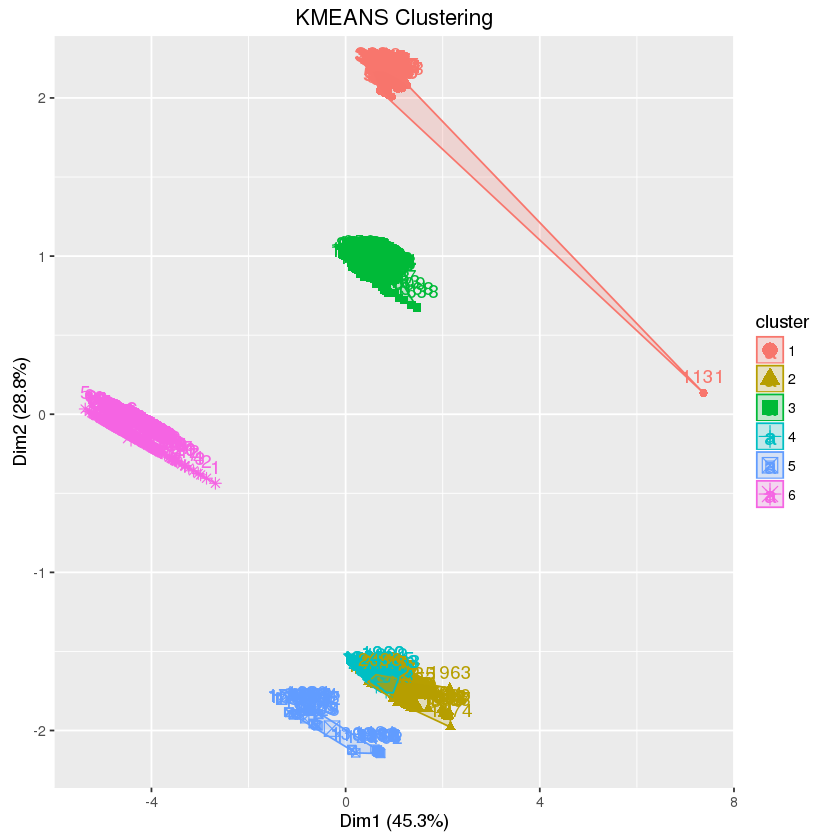

In [227]:
res.km <- select(df_cluster, 
           vessel_flow_presence, 
           io_cond_presence, 
           norm_pip_Temperature,
           norm_io_temperature,
           norm_io_dirtiness,
           norm_cs_voltage,
           norm_delta_pressure ) %>% eclust("kmeans", k = 6, nstart = 10)

The figure above shows that 6 clusters can be cleared visualized from the 1% anomalies

### K-means clustering with 6 clusters

In [212]:
h2o_cluster <- as.h2o( 
    select(df_cluster, 
           vessel_flow_presence, 
           io_cond_presence, 
           norm_pip_Temperature,
           norm_io_temperature,
           norm_io_dirtiness,
           norm_cs_voltage,
           norm_delta_pressure ))
glimpse(h2o_cluster)

  |======================================================================| 100%
Observations: 2,036
Variables: 7
$ vessel_flow_presence (dbl) 0, 0, 0, 0, 0, 0
$ io_cond_presence     (dbl) 0, 0, 0, 0, 0, 0
$ norm_pip_Temperature (dbl) 0.4486216, 0.4862155, 0.5112782, 0.5213033, 1....
$ norm_io_temperature  (dbl) 0, 0, 0, 0, 0, 0
$ norm_io_dirtiness    (dbl) 0, 0, 0, 0, 0, 0
$ norm_cs_voltage      (dbl) 0, 0, 0, 0, 0, 0
$ norm_delta_pressure  (dbl) 0, 0, 0, 0, 0, 0


In [221]:
#cluster_model <- h2o.kmeans(h2o_cluster, k = 6, init = "Random", max_iterations = 180, seed = 12, standardize = TRUE)
#print(cluster_model@model$training_metrics)

set.seed(12)
cluster_model <- NULL
max_score <- 0
for(seed in sample(100,10)) {
    temp_cluster_model <- h2o.kmeans(h2o_cluster, k = 6, init = "Random", max_iterations = 180, seed = seed, standardize = TRUE)
    print(paste("seed=", seed))
    score <- h2o.betweenss(temp_cluster_model)/h2o.totss(temp_cluster_model)
    if(max_score < score) {
        max_score <- score
        cluster_model <- temp_cluster_model
    }
    print(paste("score=", score))
}
print(cluster_model@model$training_metrics)

  |======================================================================| 100%
[1] "seed= 7"
[1] "score= 0.860570380485959"
  |======================================================================| 100%
[1] "seed= 81"
[1] "score= 0.894653562323045"
  |======================================================================| 100%
[1] "seed= 93"
[1] "score= 0.888069660894193"
  |======================================================================| 100%
[1] "seed= 27"
[1] "score= 0.84457785150193"
  |======================================================================| 100%
[1] "seed= 17"
[1] "score= 0.887402042163874"
  |======================================================================| 100%
[1] "seed= 4"
[1] "score= 0.878273314748681"
  |======================================================================| 100%
[1] "seed= 96"
[1] "score= 0.84457785150193"
  |======================================================================| 100%
[1] "seed= 60"
[1] "score= 0.8653401064368

### Analyzing resulting clusters from autoencoder

In [222]:
cluster_model@model$centers

,centroid,vessel_flow_presence,io_cond_presence,norm_pip_temperature,norm_io_temperature,norm_io_dirtiness,norm_cs_voltage,norm_delta_pressure
1,1,0.999999999999999,1,0.726579126620192,0.483576410248424,0.0144863947906178,0.704855893131576,-1.02695629777827e-15
2,2,0.648648648648649,-4.44089209850063e-16,0.861986046196573,0.678858499217781,0.982155557813452,0.887542997542998,5.55111512312578e-17
3,3,0.975193798449612,0.00155038759690329,0.694017990713217,0.55360596636185,0.987027160925571,0.716275687103594,0.00155038759689818
4,4,1,1,0.723402709672733,0.48397408082386,0.0244088482074747,0.681654808959157,0.999999999999998
5,5,1.22124532708767e-15,4.44089209850063e-16,0.689453518854608,-8.88178419700125e-16,4.44089209850063e-16,4.44089209850063e-16,0
6,6,2.44249065417534e-15,-6.66133814775094e-16,0.860732913364492,1.0547118733939e-15,1.66533453693773e-16,-1.77635683940025e-15,-2.4980018054066e-16


In [223]:
as.data.frame(cluster_model@model$centers) %>%
    mutate(
        pip_temperature = norm_pip_temperature * max(df_cluster$PIP_Temperature),
        io_temperature = norm_io_temperature * max(df_cluster$IO_temperature),
        io_dirtiness = norm_io_dirtiness * max(df_cluster$IO_dirtiness),
        cs_voltage = norm_cs_voltage * max(df_cluster$CS_Voltage),
        delta_pressure = norm_delta_pressure * max(df_cluster$Delta_Pressure)        
    ) %>%
    select(
        centroid,
        pip_temperature,
        io_temperature,
        io_dirtiness,
        cs_voltage,
        delta_pressure,
        vessel_flow_presence,
        io_cond_presence) %>%
    mutate(
        pip_temperature = round(pip_temperature),
        io_temperature = round(io_temperature),
        io_dirtiness = round(io_dirtiness),
        cs_voltage = round(cs_voltage),
        delta_pressure = round(delta_pressure),
        vessel_flow_presence = round(vessel_flow_presence) ,
        io_cond_presence = round(vessel_flow_presence) )
    

,centroid,pip_temperature,io_temperature,io_dirtiness,cs_voltage,delta_pressure,vessel_flow_presence,io_cond_presence
1,1,290,242,15,1938,0,1,1
2,2,344,340,1045,2441,0,1,1
3,3,277,277,1050,1970,0,1,1
4,4,289,242,26,1875,64,1,1
5,5,275,0,0,0,0,0,0
6,6,343,0,0,0,0,0,0


An analysis from the centroids can be summarised with the following table:


| Group Name                                   | Centroid | Comments                                                      |
| -------------------------------------------- |:--------:| --------------------------------------------------------------|
|**unknown pattern group**       |1,2,3| Patterns not visually recognized by looking at centroids information. |
|**delta pressure higher than 0**| 4 | 276 cases (almost 50% of total) where only group with delta_pressure higher 0.|
|**Mostly zeroed sensors 1**| 5 | 87 cases where all sensor values are zeroed except PIP_Temperature = 275 |
|**Mostly zeroed sensors 2**| 6 | 185 cases where all sensor values are zeroed except PIP_Temperature = 343 | 



### Comparing with clusters considering all observations

#### Extracting a sample from all observations

In [243]:
df_cluster_sample <- df_pred[sample(nrow(df_pred), data_size),] %>%      
   arrange(desc(anom_score)) %>% 
   mutate(
       norm_pip_Temperature = PIP_Temperature / max(PIP_Temperature),
       norm_io_temperature = IO_temperature / max(IO_temperature),
       norm_io_dirtiness = IO_dirtiness / max(IO_dirtiness),
       norm_cs_voltage = CS_Voltage / max(CS_Voltage),
       norm_delta_pressure = Delta_Pressure / max(Delta_Pressure)) %>%
    select( 
        vessel_flow_presence, 
        io_cond_presence, 
        norm_pip_Temperature,
        norm_io_temperature,
        norm_io_dirtiness,
        norm_cs_voltage,
        norm_delta_pressure)

#### Performing clustering internal validation to define K for K-means

In [244]:
internal_validation  <- clValid::clValid(
    df_cluster_sample , 
    2:10, 
    clMethods = c("clara", "kmeans", "hierarchical"), 
    validation = "internal",
    maxitems = nrow(df_cluster_reduced))
summary(internal_validation)
optimalScores(internal_validation)

Warning message:
In clValid::clValid(df_cluster_sample, 2:10, clMethods = c("clara", : rownames for data not specified, using 1:nrow(data)


Clustering Methods:
 clara kmeans hierarchical 

Cluster sizes:
 2 3 4 5 6 7 8 9 10 

Validation Measures:
                                  2        3        4        5        6        7        8        9       10
                                                                                                           
clara        Connectivity    0.0000   7.7694  37.4028   0.9667   3.8956   6.5202  47.7968  27.4694 106.2508
             Dunn            0.4771   0.2912   0.0114   0.3021   0.3244   0.0228   0.0126   0.0380   0.0106
             Silhouette      0.4813   0.5585   0.5816   0.6528   0.7033   0.7110   0.5915   0.6034   0.5492
kmeans       Connectivity    0.0000   0.0000   0.9333   3.8623   7.7202   4.7913   4.7913   5.7579   5.7579
             Dunn            0.4771   0.5366   0.2845   0.3695   0.3974   0.6018   0.7576   0.7576   0.4623
             Silhouette      0.4813   0.4962   0.5114   0.5316   0.5307   0.5296   0.6647   0.6698   0.6737
hierarchical Connectivity   

,Score,Method,Clusters
Connectivity,0,clara,2
Dunn,0.757589843534958,kmeans,8
Silhouette,0.711025863918954,clara,7


#### Resulting clusters visualization with recommended K above

K-means clustering with 8 clusters of sizes 389, 355, 301, 267, 45, 147, 408, 124

Cluster means:
  vessel_flow_presence io_cond_presence norm_pip_Temperature
1            1.0000000                1            0.7050174
2            1.0000000                1            0.7093373
3            1.0000000                0            0.6935630
4            0.9662921                1            0.7129182
5            0.0000000                1            0.7148060
6            0.8979592                0            0.6861700
7            1.0000000                0            0.6915374
8            0.0000000                0            0.7098307
  norm_io_temperature norm_io_dirtiness norm_cs_voltage norm_delta_pressure
1           0.6135743        0.93203365       0.6976075         0.000000000
2           0.6175084        0.67967542       0.7067013         0.000000000
3           0.6476716        0.84601142       0.7250418         0.000000000
4           0.6168984        0.84156670       0.6

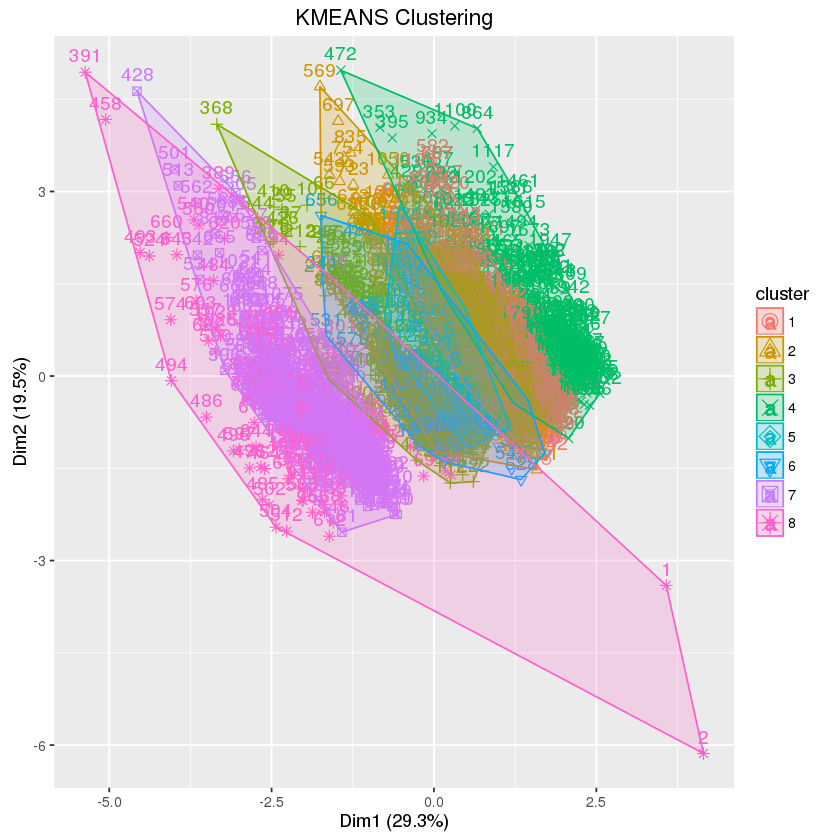

In [245]:
df_cluster_sample %>% eclust("kmeans", k = 8, nstart = 10)

The metric (between_SS / total_SS =  92.4 %) from the clustering above suggest a well separable clusters considering a sample from all observations which means 

However by looking at the centroids and the diagram it can be noted that there are differences between the clusters from the 1% most anomalous press events identified by autoencoder compared to the clusters (same K) considering a sampling from the entire population of observations.

## Conclusions and recommendations for future work
1. Auto-encoder was trained only with sensor numerical values (not categorical data used this time)

    1.1 Too much one-hot features seems to overcome the importance of the sensor features
    
    1.2 Some categorical columns such as firmware values are very rare to occur and could be interpreted as anomalies by themselves and thus they were removed


2. The 1% most anomalous observations were chosen to be grouped in clusters

    2.1 - Using 1% improved the results of the clustering algorithm perhaps because highly anomalous observations can be better separated. (see subsection Pre-cluster analysis)
    
    2.2 - When more data was used the clustering algorithms didn´t show good results


3. K-means was used as clustering algorithm with number of clusters (k) as suggested by Dunn and Silhouette metrics what lead to better results


4. In subsection Analysing resulting clusters, groups with distinct behaviors were found although one group needs further analysis to understand why it was classified as anomalies


As next steps for future work:

* Randomly choose some anomalies in each group and plot the sensor data for their respective printers in time in other to have a visual understanding about what it means

* Understand the correlation between delta pressure and anomalies

* Understand the correlation between io and pip temperatures in printers

* Perhaps repeat this experiment by normalizing the amount of events per press since presses with lots of events are better learned then presses with fewer events. This difference can be as high as 500.
    